In [1]:
import random
from deap import base, creator, tools, algorithms

%matplotlib inline

## Create a problem type and type of an individual

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

## Set Toolbox

In [3]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Create fitness function (evaluation function)

In [4]:
def evalOneMax(individual):
    return sum(individual),

## Register Genetic Operators

In [5]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)

## Create pipeline for Experiment

In [6]:
def main():
    import numpy
    
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

## Run the Experiment and report the results

gen	nevals	avg 	min	max
0  	50    	5.12	1  	9  
1  	36    	6.16	3  	9  
2  	28    	7.1 	4  	9  
3  	28    	7.66	4  	10 
4  	32    	8.44	7  	10 
5  	29    	8.84	7  	10 
6  	26    	9.32	8  	10 
7  	39    	9.64	7  	10 
8  	31    	9.88	8  	10 
9  	33    	9.66	6  	10 
10 	33    	9.82	8  	10 
Best individual is: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
with fitness: (10.0,)


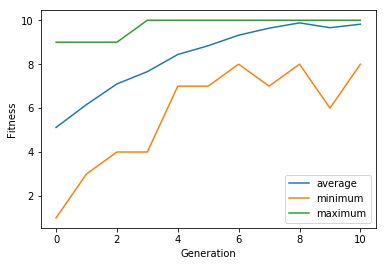

In [7]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()